In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score


# Time (BJD-2454833)
time = [112.742, 112.867, 113.018, 113.234, 113.338, 113.550, 113.733, 114.166, 229.825, 258.006, 290.086,
        320.980, 349.037, 382.955, 383.035, 412.766, 441.740, 474.535, 503.428, 537.695, 566.057, 597.811,
        628.829, 659.806, 689.762, 719.084, 752.576, 781.739, 844.444, 873.644, 905.459, 936.477, 968.762,
        999.801, 1031.800, 1062.757, 1097.862, 1125.427, 1153.523, 1181.558, 1214.517, 1244.453, 1272.590,
        1304.527, 1335.832, 1370.855, 1403.835, 1434.914, 1470.673, 1497.564, 1524.495, 1557.495]


# Flux
flux = [1.00896, 1.00886, 1.00890, 1.00867, 1.00898, 1.00888, 1.00895, 1.00873, 
             1.01067, 1.01014, 1.00574, 1.00861, 1.00887, 1.00908, 1.00909, 1.00636, 
             1.00044, 1.00541, 1.00427, 1.00600, 1.00100, 1.00520, 1.00485, 1.00238, 
             1.00437, 1.00255, 1.00458, 0.99956, 1.00183, 1.00211, 1.00186, 0.99371, 
             0.99885, 1.00380, 0.99951, 1.00132, 1.00162, 1.00150, 0.99628, 0.98754, 
             0.98096, 0.98748, 0.98337, 0.97677, 0.97986, 0.97803, 0.97467, 0.97825, 
             0.97775, 0.98010, 0.97411, 0.97780]

time_last_200 = time[-6:]
flux_last_200 = flux[-6:]


# Uncertainty (1 std. dev)
uncertainty = [0.00163, 0.00157, 0.00158, 0.00161, 0.00161, 0.00163, 0.00162, 0.00165, 0.00257, 0.00267, 0.00153,
               0.00162, 0.00156, 0.00484, 0.00483, 0.00460, 0.00502, 0.00156, 0.00154, 0.00173, 0.00256, 0.00248,
               0.00266, 0.00153, 0.00157, 0.00158, 0.00483, 0.00462, 0.00166, 0.00163, 0.00159, 0.00247, 0.00236,
               0.00248, 0.00153, 0.00151, 0.00156, 0.00453, 0.00474, 0.00505, 0.00168, 0.00166, 0.00166, 0.00250,
               0.00237, 0.00256, 0.00168, 0.00150, 0.00156, 0.00469, 0.00456, 0.00496]

# Orientation
orientation = [3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 3, 
               3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2]
               

correlation_coefficient, p_value = stats.pearsonr(time_last_200, flux_last_200)


print("Pearson's correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)


# Interpretation of results
if p_value < 0.05:
    if correlation_coefficient > 0:
        print("The flux of the star is significantly increasing.")
    elif correlation_coefficient < 0:
        print("The flux of the star is significantly decreasing.")
    else:
        print("There is no significant trend in the flux.")
else:
    print("There is no significant correlation between time and flux.")
    
    
time = np.array(time)    
flux = np.array(flux)    
a, b = np.polyfit(time, flux, 1) 
model1 = a* time + b
#print("R^2 (1) = ", r2_score(time, model1))
    
a,b,c = np.polyfit(time, flux, 2)
model2 = a*time**2 + b*time + c
#print("R^2 (2) = ", r2_score(flux, model2))
    
a,b,c,d = np.polyfit(time, flux, 3)
model3 = a*time**3 + b*time**2 + c*time + d
#print("R^2 (3) = ", r2_score(flux, model3))
   
a,b,c,d,e = np.polyfit(time, flux, 4)
model4 = a*time**4 + b*time**3 + c*time**2 + d*time + e
#print("R^2 (4) = ", r2_score(flux, model4))

a,b,c,d,e,f = np.polyfit(time, flux, 5)
model5 = a*time**5 + b*time**4 + c*time**3 + d*time**2 + e*time + f
#print("R^2 (5) = ", r2_score(flux, model5))

a,b,c,d,e,f,g = np.polyfit(time, flux, 6)
model6 = a*time**6 + b*time**5 + c*time**4 + d*time**3 + e*time**2 + f*time + g
#print("R^2 (6) = ", r2_score(flux, model6))

a,b,c,d,e,f,g,h = np.polyfit(time, flux, 7)
model7 = a*time**7 + b*time**6 + c*time**5 + d*time**4 + e*time**3 + f*time**2 + g*time + h
##print("y = ", a, "^7 + ",b, "^6 + ",c, "^5 + ",d, "^4 + ",e, "^3 + ",f, "^2 + ",g, " + ",h)
#print("R^2 (7) = ", r2_score(flux, model7))

Pearson's correlation coefficient: 0.15530322084207537
P-value: 0.7689180549486421
There is no significant correlation between time and flux.


In [2]:
from scipy.stats import wilcoxon
import numpy as np

# Wilcoxon's test

flux = [1.00896, 1.00886, 1.00890, 1.00867, 1.00898, 1.00888, 1.00895, 1.00873, 
             1.01067, 1.01014, 1.00574, 1.00861, 1.00887, 1.00908, 1.00909, 1.00636, 
             1.00044, 1.00541, 1.00427, 1.00600, 1.00100, 1.00520, 1.00485, 1.00238, 
             1.00437, 1.00255, 1.00458, 0.99956, 1.00183, 1.00211, 1.00186, 0.99371, 
             0.99885, 1.00380, 0.99951, 1.00132, 1.00162, 1.00150, 0.99628, 0.98754, 
             0.98096, 0.98748, 0.98337, 0.97677, 0.97986, 0.97803, 0.97467, 0.97825, 
             0.97775, 0.98010, 0.97411, 0.97780]

mean_flux = np.mean(flux)

difference = flux - mean_flux
magnitudes = []

for i in range(len(difference)):
    magnitudes.append(abs(difference[i]))

mangitudes = np.array(magnitudes)
arranged_flux = np.sort(magnitudes)

wrank, wrank_pVal = wilcoxon(arranged_flux)
print("Rank:", wrank, "| p-Value:", wrank_pVal)

if wrank_pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")

Rank: 0.0 | p-Value: 3.503864964208263e-10
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


In [12]:
from scipy.stats import wilcoxon
import numpy as np

flux = [1.00896, 1.00886, 1.00890, 1.00867, 1.00898, 1.00888, 1.00895, 1.00873, 
             1.01067, 1.01014, 1.00574, 1.00861, 1.00887, 1.00908, 1.00909, 1.00636, 
             1.00044, 1.00541, 1.00427, 1.00600, 1.00100, 1.00520, 1.00485, 1.00238, 
             1.00437, 1.00255, 1.00458, 0.99956, 1.00183, 1.00211, 1.00186, 0.99371, 
             0.99885, 1.00380, 0.99951, 1.00132, 1.00162, 1.00150, 0.99628, 0.98754, 
             0.98096, 0.98748, 0.98337, 0.97677, 0.97986, 0.97803, 0.97467, 0.97825, 
             0.97775, 0.98010, 0.97411, 0.97780]

flux = flux[-6:]
mean_flux = np.mean(flux)

difference = flux - mean_flux
magnitudes = []

for i in range(len(difference)):
    magnitudes.append(abs(difference[i]))

mangitudes = np.array(magnitudes)
arranged_flux = np.sort(magnitudes)

wrank, wrank_pVal = wilcoxon(arranged_flux)
print("Rank:", wrank, "| p-Value:", wrank_pVal)

if wrank_pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")

Rank: 0.0 | p-Value: 0.03125
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


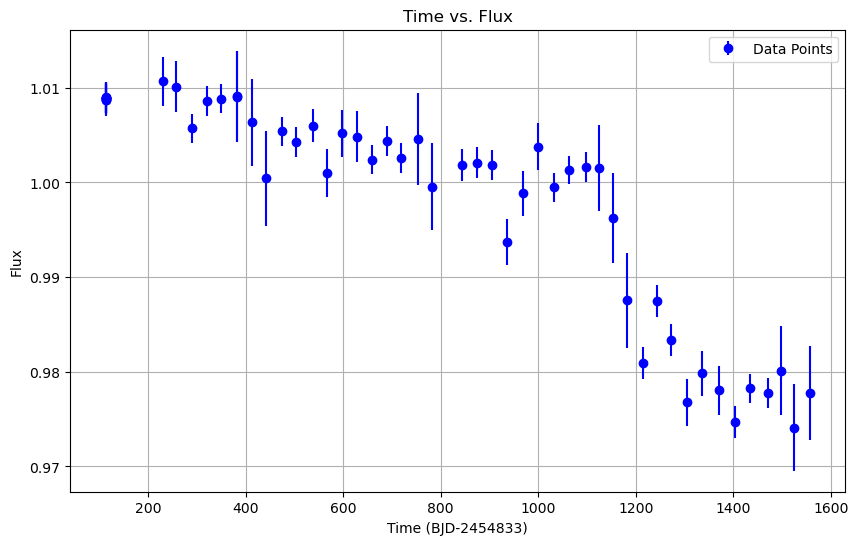

Pearson's correlation coefficient: -0.8452760751013919
P-value: 1.4813722437869914e-13
The flux of the star is significantly decreasing.


In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score

plt.figure(figsize=(10, 6)) 
plt.errorbar(time, flux, yerr=uncertainty, fmt='o', color='blue', label='Data Points')
plt.xlabel('Time (BJD-2454833)')
plt.ylabel('Flux')
plt.title('Time vs. Flux')
plt.legend()
plt.grid(True)
plt.show()

correlation_coefficient, p_value = stats.pearsonr(time[:-6], flux[:-6])

print("Pearson's correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)
if p_value < 0.05:
    if correlation_coefficient > 0:
        print("The flux of the star is significantly increasing.")
    elif correlation_coefficient < 0:
        print("The flux of the star is significantly decreasing.")
    else:
        print("There is no significant trend in the flux.")
else:
    print("There is no significant correlation between time and flux.")



Equation: y = -0.000000 * t^7 + 0.000000 * t^6 + -0.000000 * t^5 + 0.000000 * t^4 + -0.000000 * t^3 + 0.000002 * t^2 + -0.000302 * t + 1.024825
R^2 (7) = 0.9419670048364097


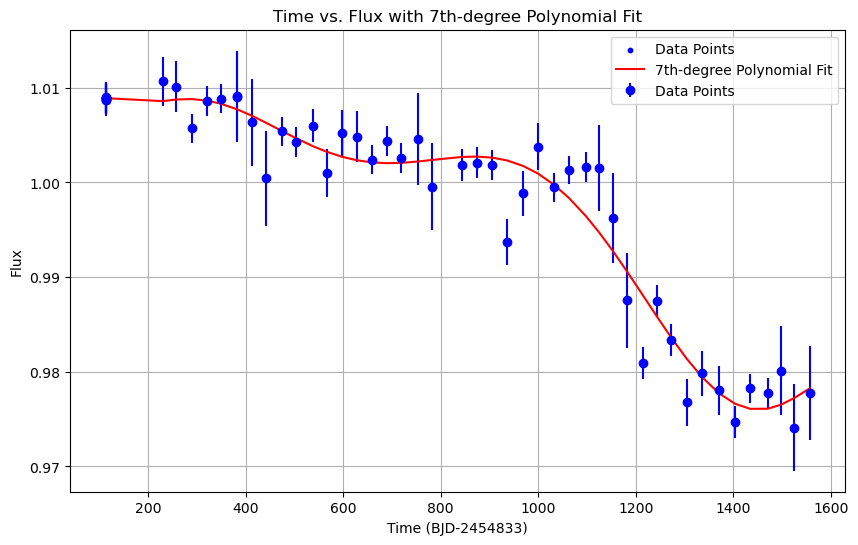

In [69]:
a, b, c, d, e, f, g, h = np.polyfit(time, flux, 7)
model7 = a*time**7 + b*time**6 + c*time**5 + d*time**4 + e*time**3 + f*time**2 + g*time + h
print("Equation: y = {:.6f} * t^7 + {:.6f} * t^6 + {:.6f} * t^5 + {:.6f} * t^4 + {:.6f} * t^3 + {:.6f} * t^2 + {:.6f} * t + {:.6f}".format(a, b, c, d, e, f, g, h))

# Calculate R-squared value
r2 = r2_score(flux, model7)
print("R^2 (7) =", r2)

# Plot the 7th-degree polynomial model
plt.figure(figsize=(10, 6))
plt.scatter(time, flux, s=10, marker='o', color='blue', label='Data Points')
plt.errorbar(time, flux, yerr=uncertainty, fmt='o', color='blue', label='Data Points')
plt.plot(time, model7, color='red', label='7th-degree Polynomial Fit')
plt.xlabel('Time (BJD-2454833)')
plt.ylabel('Flux')
plt.title('Time vs. Flux with 7th-degree Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()




[1403.835, 1434.914, 1470.673, 1497.564, 1524.495, 1557.495]
[0.97467, 0.97825, 0.97775, 0.9801, 0.97411, 0.9778]
[0.00168, 0.0015, 0.00156, 0.00469, 0.00456, 0.00496]


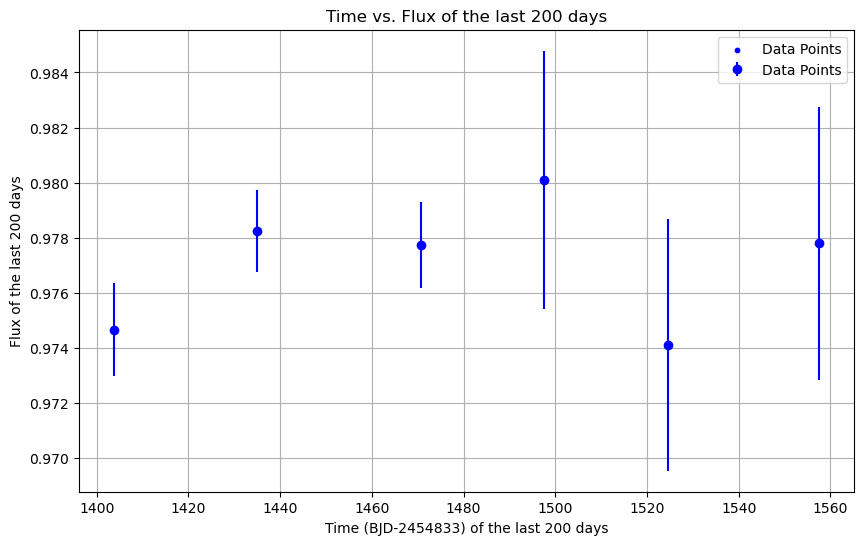

0.15530322084207537
0.7689180549486421
There is no significant correlation between time and flux.


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score


# Time (BJD-2454833)
time = [112.742, 112.867, 113.018, 113.234, 113.338, 113.550, 113.733, 114.166, 229.825, 258.006, 290.086,
        320.980, 349.037, 382.955, 383.035, 412.766, 441.740, 474.535, 503.428, 537.695, 566.057, 597.811,
        628.829, 659.806, 689.762, 719.084, 752.576, 781.739, 844.444, 873.644, 905.459, 936.477, 968.762,
        999.801, 1031.800, 1062.757, 1097.862, 1125.427, 1153.523, 1181.558, 1214.517, 1244.453, 1272.590,
        1304.527, 1335.832, 1370.855, 1403.835, 1434.914, 1470.673, 1497.564, 1524.495, 1557.495]


# Flux
flux = [1.00896, 1.00886, 1.00890, 1.00867, 1.00898, 1.00888, 1.00895, 1.00873, 
             1.01067, 1.01014, 1.00574, 1.00861, 1.00887, 1.00908, 1.00909, 1.00636, 
             1.00044, 1.00541, 1.00427, 1.00600, 1.00100, 1.00520, 1.00485, 1.00238, 
             1.00437, 1.00255, 1.00458, 0.99956, 1.00183, 1.00211, 1.00186, 0.99371, 
             0.99885, 1.00380, 0.99951, 1.00132, 1.00162, 1.00150, 0.99628, 0.98754, 
             0.98096, 0.98748, 0.98337, 0.97677, 0.97986, 0.97803, 0.97467, 0.97825, 
             0.97775, 0.98010, 0.97411, 0.97780]

uncertainty = [0.00163, 0.00157, 0.00158, 0.00161, 0.00161, 0.00163, 0.00162, 0.00165, 0.00257, 0.00267, 0.00153,
               0.00162, 0.00156, 0.00484, 0.00483, 0.00460, 0.00502, 0.00156, 0.00154, 0.00173, 0.00256, 0.00248,
               0.00266, 0.00153, 0.00157, 0.00158, 0.00483, 0.00462, 0.00166, 0.00163, 0.00159, 0.00247, 0.00236,
               0.00248, 0.00153, 0.00151, 0.00156, 0.00453, 0.00474, 0.00505, 0.00168, 0.00166, 0.00166, 0.00250,
               0.00237, 0.00256, 0.00168, 0.00150, 0.00156, 0.00469, 0.00456, 0.00496]

time_last_200 = time[-6:]
flux_last_200 = flux[-6:]
uncertainty_last_200 = uncertainty[-6:]
print(time_last_200)
print(flux_last_200)
print(uncertainty_last_200)

plt.figure(figsize=(10, 6))
plt.scatter(time_last_200, flux_last_200, s=10, marker='o', color='blue', label='Data Points')
plt.errorbar(time_last_200, flux_last_200, yerr=uncertainty_last_200, fmt='o', color='blue', label='Data Points')
plt.xlabel('Time (BJD-2454833) of the last 200 days')
plt.ylabel('Flux of the last 200 days')
plt.title('Time vs. Flux of the last 200 days')
plt.legend()
plt.grid(True)
plt.show()

correlation_coefficient, p_value = stats.pearsonr(time_last_200, flux_last_200)
print(correlation_coefficient)
print(p_value)
if p_value < 0.05:
    if correlation_coefficient > 0:
        print("The flux of the star is significantly increasing.")
    elif correlation_coefficient < 0:
        print("The flux of the star is significantly decreasing.")
    else:
        print("There is no significant trend in the flux.")
else:
    print("There is no significant correlation between time and flux.")